# Semester 3 Coding Portfolio Topic 4 Summative:
# Logistic Regression

In this notebook, you are asked to do original work with little guidance, based on the skills you learned in the formative part (as well as lectures and workshops).
This section is graded not just on passing automated tests, but also on quality, originality, and effort (see assessment criteria in the assignment description).

In [1]:
# TODO: Please enter your student number here
STUDENT_NUMBER = ...

# SUMMATIVE ASSESSMENT

For this summative assignment, we ask you to find a dataset from an internet source of choice. You will then analyze this dataset using logistic regression and interpret the results.

The general assessment criteria for all summative assignments are mentioned in the assignment description on Canvas. Each notebook also has a few specific criteria we look for; make sure you fulfil them in your approach to this assignment.
In general, make sure this notebook represents a complete project: Write an explanation of what you are hoping to achieve with your analysis, document your code well, and present results in a comprehensive way.

## Assessment criteria specific to logistic regression
 - Fitted both homogeneous and heterogeneous probability models, ensuring no errors or warnings and checking for multicollinearity through coefficient inspection.
 - Used and plotted simulations to assess coefficient significance.
 - Generated predicted probabilities and plotted posterior predictive distributions with visualizations, including histograms or intervals for uncertainty.
 - Correctly interpreted coefficients and plots in terms of magnitude, direction, statistical significance, and odds rather than log-odds.
 - Compared homogeneous and heterogeneous models using the AIC criterion and provided an accurate interpretation of the results.
 - Calculates and plots a correlation matrix to explore underlying relationships in the data.
 - Performs model selection via a sensible method, such as cross-validation, split in train-validation- test, or use of AIC or other complexity-adjusted metrics.
 - Generates predicted probabilities for different observations. If they only predicted class, give half a point.
 - By plotting or in some other way, presents the predicted probabilities for at least 1 observation, and shows comparison against true class.
 - Computes the generalisation error for a sensible metric of choice.

Pick a dataset of your choice. Please ensure your dataset is a csv file under 100MB named sem3_topic4_logreg_summative_data.csv

<table>
<tr>
<td style="vertical-align: top; padding-right: 20px;">

Reproductive health is often surrounded by stigma, and conditions like **PCOS** remain widely misunderstood. To help address this gap, I chose to build, evaluate, and compare logistic regression models that predict whether an individual is diagnosed with PCOS using demographic, lifestyle, and clinical features. This approach supports greater awareness and understanding of PCOS by identifying key factors associated with the condition.

<br><br>

Polycystic ovary syndrome (**PCOS**) is the most common hormonal disorder in women of reproductive age. The name comes from the observation of small follicles (or “cysts”) that often appear on the ovaries. However, not everyone with PCOS has these follicles, and they are not the cause of the condition.

<br><br>

The dataset simulates the prevalence and key risk factors of Polycystic Ovary Syndrome among women aged 15–49 across the world’s 75 most populous countries. It consists of **120,000 records** and **17 variables** that reflect real-world patterns and variability in PCOS diagnosis and related factors.

<br><br>

<em>PCOS definition source: Wikipedia.com  
Dataset source: Kaggle.com</em>

</td>

<td>
<!-- Replace with your image when ready -->
<img src="pcos.png" width="1550">
</td>

</tr>
</table>


In [2]:
# Do NOT modify the contents of this cell. Start your customization in the next one!
import pandas as pd

custom_data_path = "sem3_topic4_logreg_summative_data.csv"
custom_df = pd.read_csv(custom_data_path)

**IMPORTS**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    classification_report,
)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


(1) **DATA PREPARATION AND EXPLORATION**

(1.1) **EXPLORATION**

In [4]:
df = pd.read_csv("sem3_topic4_logreg_summative_data.csv")

print(f"Number of rows: {df.shape[0]:,}")      
print(f"Number of columns: {df.shape[1]}")

df.head()


Number of rows: 120,000
Number of columns: 17


,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No


In [5]:
print(df.dtypes)

Country                         object
Age                              int64
BMI                             object
Menstrual Regularity            object
Hirsutism                       object
Acne Severity                   object
Family History of PCOS          object
Insulin Resistance              object
Lifestyle Score                  int64
Stress Levels                   object
Urban/Rural                     object
Socioeconomic Status            object
Awareness of PCOS               object
Fertility Concerns              object
Undiagnosed PCOS Likelihood    float64
Ethnicity                       object
Diagnosis                       object
dtype: object


In [6]:
df.describe()

,Age,Lifestyle Score,Undiagnosed PCOS Likelihood
count,120000.000000,120000.000000,120000.000000
mean,31.980508,5.506567,0.149937
std,10.096799,2.871052,0.057786
min,15.000000,1.000000,0.050001
25%,23.000000,3.000000,0.099820
50%,32.000000,6.000000,0.149844
75%,41.000000,8.000000,0.200061
max,49.000000,10.000000,0.249998


**df.desribe INTERPRITATION**


1. count inspection shows df has no NaNs for numeric fields


2. mean, std -> av age = 32 & std 10


No expectetation to see any NaNs since df is high quality, however still double check

In [7]:
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(1)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})


print(missing_df[missing_df['Missing Count'] > 0])

               Missing Count  Missing %
Acne Severity          60085       50.1


(1.2) **DATA CLEANING**

Continue missing values inspection on Acne Severity

In [8]:
total_rows = len(df)
missing_count = df['Acne Severity'].isnull().sum()
missing_pct = (missing_count / total_rows) * 100

print(f"Total rows: {total_rows:,}")
print(f"Missing values: {missing_count:,}")
print(f"Missing percentage: {missing_pct:.1f}%")

Total rows: 120,000
Missing values: 60,085
Missing percentage: 50.1%


Since 50% data is missing drop the whole column 

In [9]:
df = df.drop('Acne Severity', axis=1)

print("\n dropped 'Acne Severity' column (50% missing data)")
print(f"Remaining columns: {df.shape[1]}")


 dropped 'Acne Severity' column (50% missing data)
Remaining columns: 16


**FINAL NaN CHECK**

In [10]:
total_missing = df.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

Total missing values in dataset: 0


(1.3) **FEATURE ENGINEERING**


Earlier when did df types most of the values in df are objects. So in order for model to understand them each value needs to be encoded (0/1). Encoding separate since both binary and binary with other values  present.

In [11]:
#regular binary encoding
df_encoded = df.copy() #cope to not touch original df

binary_columns = [
    'Hirsutism',
    'Family History of PCOS',
    'Insulin Resistance',
    'Awareness of PCOS',
    'Fertility Concerns',
    'Diagnosis'
]

for col in binary_columns:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})
    print(f"Encoded {col}: Yes into 1, No into 0")

Encoded Hirsutism: Yes into 1, No into 0
Encoded Family History of PCOS: Yes into 1, No into 0
Encoded Insulin Resistance: Yes into 1, No into 0
Encoded Awareness of PCOS: Yes into 1, No into 0
Encoded Fertility Concerns: Yes into 1, No into 0
Encoded Diagnosis: Yes into 1, No into 0


In [12]:
#nominal binary encoding 
df_encoded['Menstrual Regularity'] = df_encoded['Menstrual Regularity'].map({
    'Regular': 0, 
    'Irregular': 1
})
print(f"encoded Menstrual Regularity: regular into 0, irregular into 1")

df_encoded['Urban/Rural'] = df_encoded['Urban/Rural'].map({
    'Rural': 0, 
    'Urban': 1
})
print(f"encoded urban/rural: rural intoo 0, urban into 1")

encoded Menstrual Regularity: regular into 0, irregular into 1
encoded urban/rural: rural intoo 0, urban into 1


In [13]:
#natural order encoding
bmi_order = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df_encoded['BMI'] = df_encoded['BMI'].map(bmi_order)
print(f"encoded BMI: Underweight into 0, Normal into 1, Overweight into 2, Obese into 3")

stress_order = {'Low': 0, 'Medium': 1, 'High': 2}
df_encoded['Stress Levels'] = df_encoded['Stress Levels'].map(stress_order)
print(f"encoded Stress Levels: Low into 0, Medium into 1, High into 2")

socioecon_order = {'Low': 0, 'Middle': 1, 'High': 2}
df_encoded['Socioeconomic Status'] = df_encoded['Socioeconomic Status'].map(socioecon_order)
print(f"encoded Socioeconomic Status: Low into 0, Middle into 1, High into 2")

encoded BMI: Underweight into 0, Normal into 1, Overweight into 2, Obese into 3
encoded Stress Levels: Low into 0, Medium into 1, High into 2
encoded Socioeconomic Status: Low into 0, Middle into 1, High into 2


In [14]:
ethnicity_dummies = pd.get_dummies(df_encoded['Ethnicity'], prefix='Ethnicity', drop_first=True)
print(f"New columns created: {list(ethnicity_dummies.columns)}")

df_encoded = pd.concat([df_encoded, ethnicity_dummies], axis=1)
df_encoded = df_encoded.drop('Ethnicity', axis=1)

print("Ethnicity one-hot encoded")

New columns created: ['Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Hispanic', 'Ethnicity_Other']
Ethnicity one-hot encoded


In [15]:
df_encoded = df_encoded.drop('Country', axis=1)
print("dropped 'Country' column (too many cats)")

#potential data leakage because this directly indicates likelihood of having PCOS
#so if kept it would confuse model into thinking it's a predictor
#circular logic = bad so drop
df_encoded = df_encoded.drop('Undiagnosed PCOS Likelihood', axis=1)
print("dropped 'Undiagnosed PCOS Likelihood' column")

dropped 'Country' column (too many cats)
dropped 'Undiagnosed PCOS Likelihood' column


**FINAL ENCODED DF CHECK**

In [16]:
print(f"Shape: {df_encoded.shape}")
print(f"\nColumns ({len(df_encoded.columns)}):")
print(list(df_encoded.columns))

Shape: (120000, 17)

Columns (17):
['Age', 'BMI', 'Menstrual Regularity', 'Hirsutism', 'Family History of PCOS', 'Insulin Resistance', 'Lifestyle Score', 'Stress Levels', 'Urban/Rural', 'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns', 'Diagnosis', 'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Hispanic', 'Ethnicity_Other']


(1.4) **TRAIN TEST SPLIT**

Separate features x from target y

In [17]:
X = df_encoded.drop('Diagnosis', axis=1)  # All columns EXCEPT Diagnosis
y = df_encoded['Diagnosis']                # ONLY the Diagnosis column

print(f"Features (X): {X.shape[0]:,} rows × {X.shape[1]} columns")
print(f"Target (y): {y.shape[0]:,} values")

Features (X): 120,000 rows × 16 columns
Target (y): 120,000 values


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,       #20% test size
    random_state=42,     #common random state for reproducibility
    stratify=y           #same proportions for each class in train/test (keeps the same pcos yes/no ratio)
)

print(f"\nSplit complete!")
print(f"  Training set: {X_train.shape[0]:,} samples")
print(f"  Test set:     {X_test.shape[0]:,} samples")


Split complete!
  Training set: 96,000 samples
  Test set:     24,000 samples


double check stratification worked

In [19]:
print(f"Original data  -> PCOS rate: {y.mean()*100:.2f}%")
print(f"Training set   -> PCOS rate: {y_train.mean()*100:.2f}%")
print(f"Test set       -> PCOS rate: {y_test.mean()*100:.2f}%")

Original data  -> PCOS rate: 10.50%
Training set   -> PCOS rate: 10.50%
Test set       -> PCOS rate: 10.50%


create a combined df

In [20]:
train_data = X_train.copy()
train_data['Diagnosis'] = y_train

test_data = X_test.copy()
test_data['Diagnosis'] = y_test

print(f"train_data: {train_data.shape[0]:,} rows by {train_data.shape[1]} columns")
print(f"test_data:  {test_data.shape[0]:,} rows by {test_data.shape[1]} columns")

train_data: 96,000 rows by 17 columns
test_data:  24,000 rows by 17 columns


(2) **EXPLORATORY DATA ANALYSIS**

(2.1) **CLASS IMBALANCE VISUAL**


Earlier it was seen that in the dataset only 10% of people were diagnosed with pcos. This creates a class/category imbalance so gotta keep it in mind before modelling.

In [21]:
print("\nValue counts:")
print(train_data['Diagnosis'].value_counts())
print(f"\nPCOS rate: {train_data['Diagnosis'].mean()*100:.2f}%")


Value counts:
Diagnosis
0    85924
1    10076
Name: count, dtype: int64

PCOS rate: 10.50%


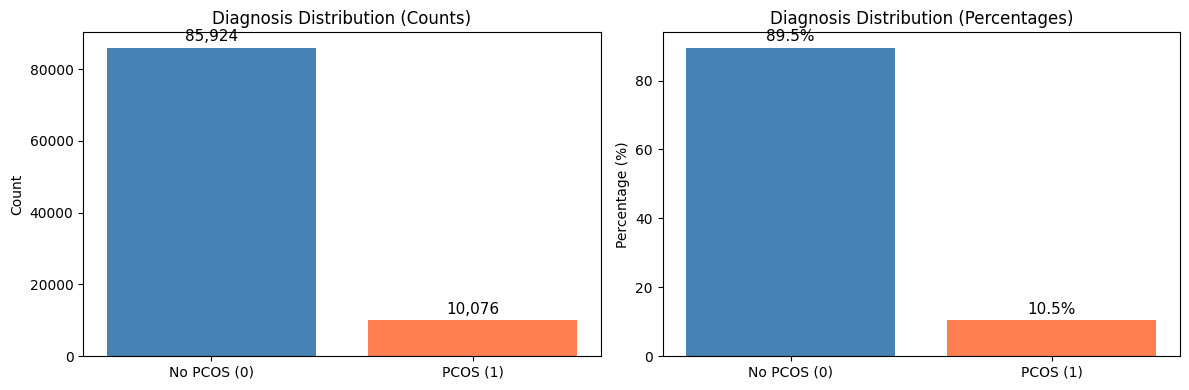


  Note: Classes are imbalanced -> ~10% PCOS vs ~90% No PCOS
   This is medical data special and also shows an interesting point about PCOS diagnosising practices.


In [22]:
#visuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#plot 1: count plot
ax1 = axes[0]
counts = train_data['Diagnosis'].value_counts()
bars = ax1.bar(['No PCOS (0)', 'PCOS (1)'], counts.values, color=['steelblue', 'coral'])
ax1.set_ylabel('Count')
ax1.set_title('Diagnosis Distribution (Counts)')

#count labels on bars
for bar, count in zip(bars, counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{count:,}', ha='center', va='bottom', fontsize=11)

#plot 2: % plot
ax2 = axes[1]
percentages = train_data['Diagnosis'].value_counts(normalize=True) * 100
bars2 = ax2.bar(['No PCOS (0)', 'PCOS (1)'], percentages.values, color=['steelblue', 'coral'])
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Diagnosis Distribution (Percentages)')

#% labels on bars
for bar, pct in zip(bars2, percentages.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print("\n  Note: Classes are imbalanced -> ~10% PCOS vs ~90% No PCOS")
print("   This is medical data special and also shows an interesting point about PCOS diagnosising practices.")

(2.2) **CORRELATION MATRIX**

In [23]:
correlation_matrix = train_data.corr()

#table
print("\nCorrelation values (rounded to 2 decimal places):")
print(correlation_matrix.round(2))


Correlation values (rounded to 2 decimal places):
                         Age   BMI  Menstrual Regularity  Hirsutism  \
Age                     1.00  0.01                  0.00       0.01   
BMI                     0.01  1.00                  0.00      -0.00   
Menstrual Regularity    0.00  0.00                  1.00       0.01   
Hirsutism               0.01 -0.00                  0.01       1.00   
Family History of PCOS  0.00  0.00                 -0.00      -0.00   
Insulin Resistance      0.00 -0.00                  0.00       0.00   
Lifestyle Score         0.00  0.00                  0.00      -0.00   
Stress Levels           0.00  0.00                 -0.00      -0.00   
Urban/Rural             0.01  0.00                 -0.00      -0.00   
Socioeconomic Status   -0.00  0.00                  0.00      -0.00   
Awareness of PCOS       0.00  0.00                  0.00      -0.00   
Fertility Concerns     -0.00  0.00                  0.00       0.00   
Ethnicity_Asian         0.

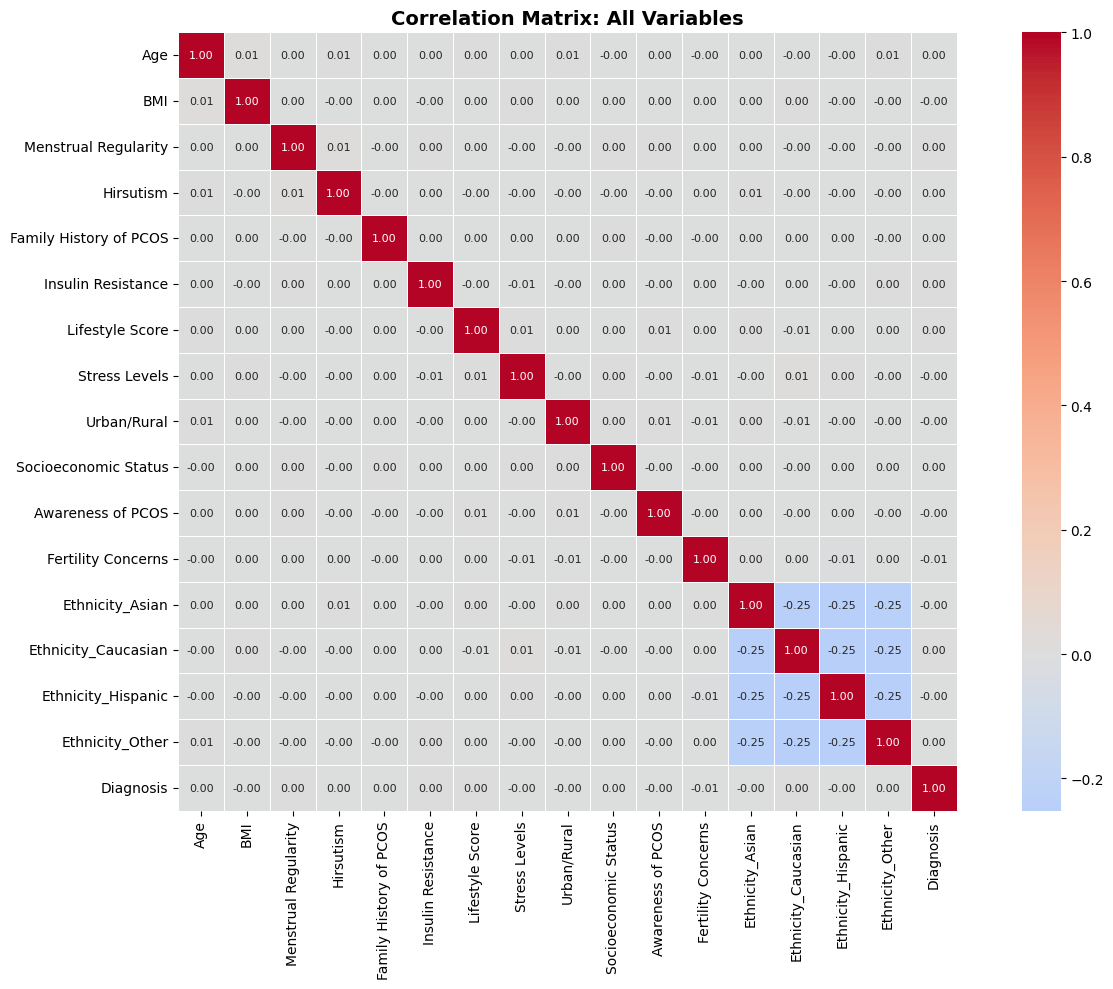

In [24]:
# Visualise as a heatmap
plt.figure(figsize=(14, 10))

sns.heatmap(
    correlation_matrix,
    annot=True,          # Show numbers in cells
    fmt='.2f',           # 2 decimal places
    cmap='coolwarm',     # Blue = negative, Red = positive
    center=0,            # White at 0
    square=True,         # Square cells
    linewidths=0.5,      # Lines between cells
    annot_kws={'size': 8}  # Font size for numbers
)

plt.title('Correlation Matrix: All Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**ISSUES**


Both table and visual correlation matrix indicate EXTREMELY low correlations. From now on I will assume the dataset I am using is AI generated.

In [25]:
print("\nPCOS rate by Hirsutism:")
print(train_data.groupby('Hirsutism')['Diagnosis'].mean().round(4) * 100)

#pcos rate menstr irreg
print("\nPCOS rate by Menstrual Regularity (0=Regular, 1=Irregular):")
print(train_data.groupby('Menstrual Regularity')['Diagnosis'].mean().round(4) * 100)

#pcos rate insulin resistance
print("\nPCOS rate by Insulin Resistance:")
print(train_data.groupby('Insulin Resistance')['Diagnosis'].mean().round(4) * 100)

#pcos rate family history
print("\nPCOS rate by Family History of PCOS:")
print(train_data.groupby('Family History of PCOS')['Diagnosis'].mean().round(4) * 100)


PCOS rate by Hirsutism:
Hirsutism
0    10.46
1    10.55
Name: Diagnosis, dtype: float64

PCOS rate by Menstrual Regularity (0=Regular, 1=Irregular):
Menstrual Regularity
0    10.42
1    10.68
Name: Diagnosis, dtype: float64

PCOS rate by Insulin Resistance:
Insulin Resistance
0    10.44
1    10.66
Name: Diagnosis, dtype: float64

PCOS rate by Family History of PCOS:
Family History of PCOS
0    10.49
1    10.50
Name: Diagnosis, dtype: float64


**CONCLUSIONS**


1. extreme class imbalance


2. AI generated dataset (shame on fake comments on Kaggle about its perfection)


3. extremely weak correlations ~0.00 -> no linear relationship


4. pcos rates are nearly IDENTICAL across all feature groups


5. even though these findings still nothing prevents to keep using the same dataset for log regression

(3) **HOMOGENEOUS MODEL - only CLINICAL predictors**

In [26]:
formula_homogeneous = 'Diagnosis ~ BMI + Hirsutism + Q("Menstrual Regularity") + Q("Insulin Resistance") + Q("Family History of PCOS")'

model_homogeneous = smf.logit(formula_homogeneous, data=train_data).fit()

# Display summary
print(model_homogeneous.summary())

Optimization terminated successfully.
         Current function value: 0.335823
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                96000
Model:                          Logit   Df Residuals:                    95994
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:               6.058e-05
Time:                        18:39:51   Log-Likelihood:                -32239.
converged:                       True   LL-Null:                       -32241.
Covariance Type:            nonrobust   LLR p-value:                    0.5629
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.1377      0.027    -79.223      0.000   

**INTERPRITATIONS HELPERS**


1. MLE -> max likelehood estimation, st way to estima logred coeffs


2. Converged: true -> numerical optimizer stopped cuz convergence criteria satisf aka solution = found


3. Covariance type: nonrobust -> ?


4. Df residuals -> n of obs - n of estim params


5. Df model -> n of predictors(-intercept)


6. Log likelihood -> 


7. Pseudo r squared -> likelihood analogue of r^2 


8. LL null -> log likelihood of null model (only intercept)


9. log likelihood vs ll null = how much predictors improved fit


10. LLR p value -> higher value = less significance over null


11. residual -> y_actual-y_predicted


12. model’s baseline probability of Diagnosis = 1 is exp(−2.1377)/(1+exp(−2.1377)) ≈ 0.106


13. **log regression model predicts log-odds**:


{B0} = (each feature at reference lvl (0)) plugging cuz intercept = log-odds baseline before any predictor shifts it


14. log-odd -> natural log of the odds of an event -> Diagnosis = 1, odds = p / (1 − p), and log-odds = ln(p / (1 − p)) -> logreg models log-odds as a linear combination of events

In [27]:
X_homogeneous = train_data[['BMI', 'Hirsutism', 'Menstrual Regularity', 
                             'Insulin Resistance', 'Family History of PCOS']]
X_with_const = sm.add_constant(X_homogeneous)

vif_data = pd.DataFrame({
    'Feature': X_homogeneous.columns,
    'VIF': [variance_inflation_factor(X_with_const.values, i+1) 
            for i in range(len(X_homogeneous.columns))]
})

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                  Feature       VIF
0                     BMI  1.000018
1               Hirsutism  1.000071
2    Menstrual Regularity  1.000071
3      Insulin Resistance  1.000017
4  Family History of PCOS  1.000009


**INTERPRITATION HELPER**


1. variance how spread out values are round mean = fluctuation average


2. VIF how much multicollinearity inflates coeff's variance 


**WHY VIF matters**


When predictors are highly correlated, the model can’t distinguish which one should “get credit” for explaining the outcome. Their effects overlap, so many combinations of coefficients fit almost equally well. Mathematically, that makes the design matrix nearly singular, which blows up the inverse used to compute coefficient estimates. As a result, tiny changes in the data lead to large swings in those coefficients—i.e., their estimated variance becomes large. The VIF captures this: high multicollinearity (R² near 1 when regressing a predictor on the others) makes 1 − R² tiny, so 1 / (1 − R²) becomes big, indicating inflated variance.

In [28]:
homogeneous_results = {
    'aic': model_homogeneous.aic,
    'bic': model_homogeneous.bic,
    'log_likelihood': model_homogeneous.llf
}

print(f"\nAIC: {model_homogeneous.aic:.2f}")
print(f"BIC: {model_homogeneous.bic:.2f}")


AIC: 64489.93
BIC: 64546.77


In [29]:
# Simple model:    Diagnosis ~ BMI + Hirsutism
#                 → Fits OK

# Complex model:   Diagnosis ~ BMI + Hirsutism + Age + Ethnicity + 
#                             Stress + Urban + ... (20 variables)
#                 → Fits better! But...

In [30]:
# AIC&BIC balance -> Score = How well it fits  +  Penalty for complexity
#                               (want this high)     (want this low)

In [31]:
# AIC = -2(Log-Likelihood) + 2(number of parameters)
# BIC = -2(Log-Likelihood) + log(n)(number of parameters)
#                           ↑
#                           Bigger penalty when you have lots of data

(4) **HETEROGENEOUS MODEL - demographics & interactions**

In [32]:
formula_heterogeneous = '''
Diagnosis ~ BMI + Hirsutism + Q("Menstrual Regularity") + Q("Insulin Resistance") + Q("Family History of PCOS") 
            + Age + Q("Socioeconomic Status") + Q("Urban/Rural")
            + Ethnicity_Asian + Ethnicity_Caucasian + Ethnicity_Hispanic + Ethnicity_Other
            + Q("Insulin Resistance"):Ethnicity_Asian
'''

# Fit the model
model_heterogeneous = smf.logit(formula_heterogeneous, data=train_data).fit()

# Display summary
print(model_heterogeneous.summary())

Optimization terminated successfully.
         Current function value: 0.335806
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                96000
Model:                          Logit   Df Residuals:                    95986
Method:                           MLE   Df Model:                           13
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:               0.0001111
Time:                        18:39:52   Log-Likelihood:                -32237.
converged:                       True   LL-Null:                       -32241.
Covariance Type:            nonrobust   LLR p-value:                    0.8934
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                         

In [33]:
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
                  Feature       VIF
0                     BMI  1.000018
1               Hirsutism  1.000071
2    Menstrual Regularity  1.000071
3      Insulin Resistance  1.000017
4  Family History of PCOS  1.000009


In [34]:
heterogeneous_results = {
    'aic': model_heterogeneous.aic,
    'bic': model_heterogeneous.bic,
    'log_likelihood': model_heterogeneous.llf
}

print(f"\nAIC: {model_heterogeneous.aic:.2f}")
print(f"BIC: {model_heterogeneous.bic:.2f}")


AIC: 64502.67
BIC: 64635.28


**HOME&HETERO MODEL COMPARISON**

In [35]:
print("MODEL COMPARISON: Homogeneous vs Heterogeneous")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Model': ['Homogeneous', 'Heterogeneous'],
    'Predictors': [5, 12],
    'AIC': [homogeneous_results['aic'], heterogeneous_results['aic']],
    'BIC': [homogeneous_results['bic'], heterogeneous_results['bic']]
})

print(comparison_df.to_string(index=False))

MODEL COMPARISON: Homogeneous vs Heterogeneous
        Model  Predictors          AIC          BIC
  Homogeneous           5 64489.933883 64546.766504
Heterogeneous          12 64502.673943 64635.283392
